# Mathematical Optimization

Mathematical Optimization deals with the problem of finding numerically minimums (or maximums or zeros) of a function. In this context, the function is called **cost function**, **objective function** or **energy**.

### Dimensionality of the problem

The scale of an optimization problem is set by the dimensionality of the problem, i.e. the number of scalar variables on which the search is performed. **Optimizing smooth function is easier**

Types of problems
* Convex vs non-convex
* Smooth vs non-smooth
* Noisy vs non-noisy
* Optimization under constraints or without them.

#### Brent’s method 
**On a quadratic function ** it converges in 3 iterations, as the quadratic approximation is then exact. Brent’s method on a **non-convex function**,  the fact that the optimizer avoided the local minimum is a matter of luck.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [11]:
from scipy import optimize

def f_cuadratic(x):
    return -np.exp(-(x - .7)**2)

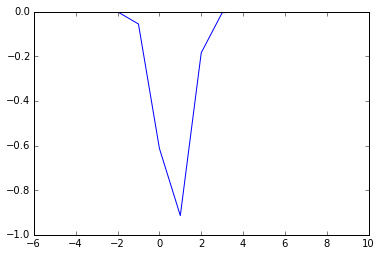

In [12]:
x = np.arange(-5,10)
plt.plot(x, f_cuadratic(x))

In [8]:
x_min = optimize.brent(f)
print x_min
print x_min - .7

0.699999999784
-2.16059059532e-10


## Gradient based methods

At a theoretical level, gradient descent is an algorithm that minimizes functions. Given a function defined by a ser of parameters, gradient descent starts with an initial set of parameters values and iteratively moves toward a set of parameters values that minimize the function.Gradient descent basically consists in taking small steps in the direction of the gradient, that is the direction of the steepest descent; taking steps in the negative direction of the function gradient. The core problem of gradient-methods on ill-conditioned problems is that the gradient tends no to point in the direction of the minimum.

In [7]:
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/Preconditioner', width=800, height=400)

## Conjugate gradient descent

Some gradient descent algorithms are toys not to be used on real problems. One of the problems of the simple gradient descent algorithms, is that they tend to oscilate across a valley, each time following the direciton of the fradient, that makes it cross the valley. The conjugate gradient solves this problem by adding a friction term: each step depends on the two last values on the gradiend and shart turns to be reduced. To run gradient descent on an error function, we first need to compute its gradient. The gradient will act like a compass and always point us downhill

These methods need the gradient of the function. They can compute it, but will perform better if you can pass them the gradient

In [13]:
def f(x):
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2) ** 2

In [15]:
optimize.fmin_cg(f, [2,2])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 120
         Gradient evaluations: 30


array([ 0.99998968,  0.99997855])

In [18]:
def fprime(x): # The rosenbrock function
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

In [19]:
# Only 30 evaluations, compared with 120 without gradient
optimize.fmin_cg(f, [2,2], fprime=fprime)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 30
         Gradient evaluations: 30


array([ 0.99999199,  0.99998336])

In [20]:
def compute_error(b,m, points):
    total_error = 0
    for i in range(0, len(points)):
        totalError += (points[i].y - (m * points[i].x + b)**2)
    return total_error / float(len(points))